In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_model import ARMA
import data_reader as dr

In [9]:
data, source = dr.read('kospi.csv')
data.info()

Loading data from file /home/changhyun/workspace/cxk858/dataset/kospi.csv...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2471 entries, 1 to 2483
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2471 non-null   object 
 1   Open                 2471 non-null   float64
 2   High                 2471 non-null   float64
 3   Low                  2471 non-null   float64
 4   Close                2471 non-null   float64
 5   Adj Close            2471 non-null   float64
 6   Volume               2471 non-null   float64
 7   Daily_trading_range  2471 non-null   float64
 8   Log_Volume_change    2471 non-null   float64
 9   Daily_return         2471 non-null   float64
 10  Daily_log_return     2471 non-null   float64
 11  Past_vol22           2450 non-null   float64
 12  Past_vol10           2462 non-null   float64
 13  Target22             2449 non-null   float64
 14  Target10  

In [18]:
data_cleaned = data[21:].dropna()
data_cleaned

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_trading_range,Log_Volume_change,Daily_return,Daily_log_return,Past_vol22,Past_vol10,Target22,Target10
23,2011-01-04,2074.560059,2085.139893,2069.120117,2085.139893,2085.139893,415900.0,16.019776,16.086549,0.007275,0.007249,0.086037,0.075668,0.104995,0.099439
24,2011-01-05,2083.100098,2087.139893,2076.919922,2082.550049,2082.550049,386100.0,10.219971,-7.434844,-0.001242,-0.001243,0.087213,0.072652,0.102572,0.089788
25,2011-01-06,2094.350098,2096.649902,2066.100098,2077.610107,2077.610107,407800.0,30.549804,5.468045,-0.002372,-0.002375,0.087567,0.075905,0.106966,0.103402
26,2011-01-07,2073.679932,2086.199951,2068.659912,2086.199951,2086.199951,335600.0,17.540039,-19.485688,0.004134,0.004126,0.087481,0.075547,0.107443,0.102397
27,2011-01-10,2082.290039,2088.639893,2069.300049,2080.810059,2080.810059,342600.0,19.339844,2.064361,-0.002584,-0.002587,0.086771,0.072736,0.107598,0.106351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,2020-12-23,2737.739990,2769.080078,2716.280029,2759.820068,2759.820068,1121300.0,52.800049,-11.725771,0.009562,0.009517,0.162242,0.116865,0.145425,0.145386
2480,2020-12-24,2762.600098,2812.159912,2762.600098,2806.860107,2806.860107,1030900.0,49.559814,-8.405652,0.017045,0.016901,0.169021,0.141552,0.145547,0.138318
2481,2020-12-28,2820.949951,2834.590088,2799.560059,2808.600098,2808.600098,1006200.0,35.030029,-2.425135,0.000620,0.000620,0.166023,0.137070,0.140271,0.141724
2482,2020-12-29,2810.550049,2823.439941,2792.060059,2820.510010,2820.510010,1046800.0,31.379882,3.955703,0.004241,0.004232,0.164762,0.135559,0.139982,0.143859


In [27]:
past_vol22 = data_cleaned[['Past_vol22']]
past_vol10 = data_cleaned[['Past_vol10']]
model = ARMA(past_vol10, order=(3,3))
model_fit = model.fit()

,Past_vol10
23,0.075668
24,0.072652
25,0.075905
26,0.075547
27,0.072736
...,...
2479,0.116865
2480,0.141552
2481,0.137070
2482,0.135559


In [20]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Past_vol10   No. Observations:                 2449
Model:                     ARMA(3, 3)   Log Likelihood                6072.133
Method:                       css-mle   S.D. of innovations              0.020
Date:                Sun, 21 Mar 2021   AIC                         -12128.265
Time:                        20:53:15   BIC                         -12081.838
Sample:                             0   HQIC                        -12111.392
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1409      0.011     12.740      0.000       0.119       0.163
ar.L1.Past_vol10     0.4120      0.143      2.879      0.004       0.132       0.692
ar.L2.Past_vol10     0.8123      0.030     26.949      0.000       0.753       0.871
ar.L3.Past_vol10    -0.2861      0.133     -2.152      0.031      -0.547      -0.026
ma.L1.Past_vol10     0.6376      0.142      4.482      0.000       0.359       0.916
ma.L2.Past_vol10    -0.1206      0.155     -0.777      0.437      -0.425       0.184
ma.L3.Past_vol10     0.1630      0.026      6.296      0.000       0.112       0.214
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1361           +0.0000j            1.1361            0.5000
AR.2            1.0525           +0.0000j            1.0525            0.0000
AR.3            2.9233           +0.0000j            2.9233            0.0000
MA.1           -1.0561           -0.0000j            1.0561           -0.5000
MA.2            0.8979           -2.2363j            2.4098           -0.1892
MA.3            0.8979           +2.2363j            2.4098            0.1892
-----------------------------------------------------------------------------
"""

In [21]:
pred = model_fit.predict()
pred

23      0.140918
24      0.077576
25      0.074560
26      0.078112
27      0.078179
          ...   
2479    0.147489
2480    0.114830
2481    0.140667
2482    0.136219
2483    0.139772
Length: 2449, dtype: float64

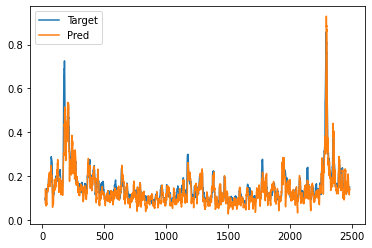

In [28]:
plt.plot(data_cleaned[['Target10']], label='Target')
plt.plot(pred, label='Pred')
plt.legend()
plt.show()

In [29]:
import metrics as mt

In [30]:
mt.testScore(pred, data_cleaned[['Target10']])

test Score: 0.0015953123599620346 MSE
test Score: 0.039941361518631716 RMSE
test Score: 0.22082710130210523 MAPE
